In [11]:
testSize = 2000
scores = [random.random() for _ in range(testSize)]
outcomes = random.choices([True,False], k=testSize)

In [12]:
import pandas as pd
import random
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
from scipy.stats import beta

def plotProbabilityOfPrecisionBiggerThan60p(scores, outcomes):
    df = pd.DataFrame({'outcomes':outcomes, 'scores': scores})
    df['counter']=1
    df.outcomes= df.outcomes.apply(int)
    df = df.sort_values(by='scores', ascending=False)
    so = df.groupby('scores')['outcomes'].sum()
    sc = df.groupby('scores')['counter'].sum()
    dg = pd.concat([so,sc],axis=1)
    dg = dg.sort_index(ascending=False)
    dc = dg.cumsum()
    dc.columns = ['k', 'N']
    dc['precision']=dc.k/dc.N
    dc['recall']=dc.k/dc.k.max()
    dc['P(precision)>0.6']=dc.apply(lambda x: 1-beta.cdf(0.6, 1+x.k, 1+x.N-x.k), axis=1)
    dc['P(precision)>0.6'].plot(title='probability of precision bigger than 60%')

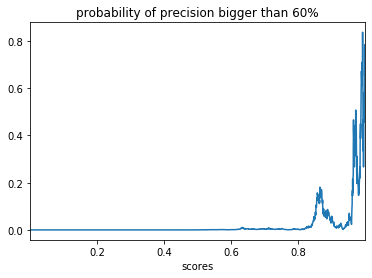

In [13]:
dc=plotProbabilityOfPrecisionBiggerThan60p(scores, outcomes)

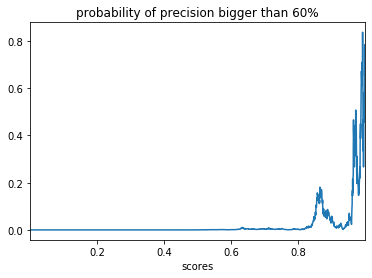

In [14]:
df = pd.DataFrame({'outcomes':outcomes, 'scores': scores})
df['counter']=1
df.outcomes= df.outcomes.apply(int)
df = df.sort_values(by='scores', ascending=False)
so = df.groupby('scores')['outcomes'].sum()
sc = df.groupby('scores')['counter'].sum()
dg = pd.concat([so,sc],axis=1)
dg = dg.sort_index(ascending=False)
dc = dg.cumsum()
dc.columns = ['k', 'N']
dc['precision']=dc.k/dc.N
dc['recall']=dc.k/dc.k.max()
dc['P(precision)>0.6']=dc.apply(lambda x: 1-beta.cdf(0.6, 1+x.k, 1+x.N-x.k), axis=1)
dc['P(precision)>0.6'].plot(title='probability of precision bigger than 60%')

In [31]:
# smallest valid threshold!
threshold = dc[dc['P(precision)>0.6']>0.7].index[-1]
expectedRecall= threshold = dc[dc['P(precision)>0.6']>0.7].recall.values[-1]